In [29]:
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math
from numpy.linalg import inv
import matplotlib

# Exercise 1

## Q-1.1
تصویر را به فضای رنگ گری اسکیل برده و آن را نمایش دهید

(array([[108, 111, 116, ..., 212, 212, 212],
        [110, 111, 112, ..., 214, 213, 213],
        [117, 113, 108, ..., 214, 214, 213],
        ...,
        [169, 168, 169, ..., 158, 157, 157],
        [169, 168, 169, ..., 156, 155, 156],
        [169, 168, 169, ..., 154, 155, 154]]),
 (748, 1116),
 255,
 0)

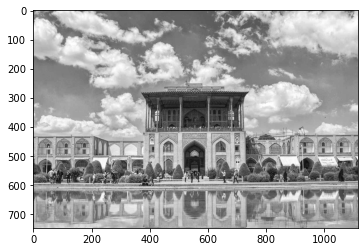

In [30]:
rgb_im = Image.open("assignment1/assignment1/images/alighapoo.jpg")
rgb_arr = asarray(rgb_im)

# The RGB values are converted to grayscale using the NTSC formula: 
# 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. 
# This formula closely represents the average person's relative 
# perception of the brightness of red, green, and blue light.

if len(rgb_arr.shape)==3:
    img_arr = np.floor(rgb_arr[:,:,0]*0.299 + rgb_arr[:,:,1]*0.587 + rgb_arr[:,:,2]*0.114).astype(int)
else:
    img_arr = rgb_arr
    
imgplot = plt.imshow(img_arr , cmap="gray")

img_arr, img_arr.shape,  max(img_arr.flatten()), min(img_arr.flatten())

## Q-1.2
مقدار بیشینه و کمینه روشنایی را محاسبه کنید

In [31]:
max_lum = max(img_arr.flatten())
min_lum = min(img_arr.flatten())
max_lum, min_lum

(255, 0)

## Q-1.3
مقدار میانگین روشنایی را محاسبه کنید

In [32]:
mean_lum = img_arr.flatten().sum()/(len(img_arr.flatten()))
mean_lum

155.98711258697028

## Q-1.4
مقدار واریانس روشنایی را محاسبه کنید

In [33]:
lum_var = ((img_arr.flatten() - mean_lum)**2).sum() / (len(img_arr.flatten()))
lum_var

2716.2002225255524

# Exercise 2
بر روی تصویری که از عمارت عالی قاپو قرار داده شده است. در هر یک از راستاهای زیر لبه های زیر لبه ها را بیابید

(array([[108, 112, 116, ..., 213, 213, 213],
        [111, 112, 113, ..., 214, 214, 214],
        [117, 113, 109, ..., 214, 214, 214],
        ...,
        [170, 169, 169, ..., 158, 158, 158],
        [170, 169, 169, ..., 156, 156, 156],
        [170, 169, 169, ..., 155, 155, 155]], dtype=uint8),
 2716.427558555292,
 (748, 1116))

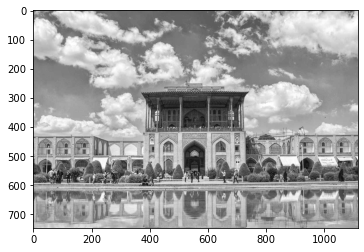

In [80]:
im = Image.open("assignment1/assignment1/images/alighapoo.jpg").convert('L')
# im.show()

img_arr = asarray(im)
imgplot = plt.imshow(img_arr , cmap="gray")

img_arr, img_arr.var(), img_arr.shape

In [81]:
def edge_detect(edge_filter, img_arr):
    filter_size = edge_filter.shape[0]
    # shape = same

    # (x-1, y-1) (x-1, y) (x-1, y+1)
    # (x,   y-1) (x,   y) (x,   y+1) 
    # (x+1, y-1) (x+1, y) (x+1, y+1)
    out = np.zeros(img_arr.shape)
    for x in range(img_arr.shape[0]):
        for y in range(img_arr.shape[1]):

            new_val = 0
            count = 0 ####
            for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
                for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
                    if not (x+f_i < 0 or x+f_i >= img_arr.shape[0] or y+f_j<0 or y+f_j >=img_arr.shape[1]):
                        new_val += img_arr[x+f_i][y+f_j] * edge_filter[int(filter_size/2)+f_i][int(filter_size/2)+f_j]
                        count += edge_filter[int(filter_size/2)+f_i][int(filter_size/2)+f_j] ####
                    else:
                        new_val += 0
                        count += 0

            if count == 0: out[x][y] = int(new_val)
            else: out[x][y] = int(new_val/count)

    out_test = np.array(out)
    out_test += -(min(out.flatten()))
    out_test = ((out_test - min(out_test.flatten())) * ((255 - 0) / max(out_test.flatten())-min(out_test.flatten()))) + 0
    out_test = out_test.astype(int)
    print(out_test)

    imgplot = plt.imshow(out_test , cmap="gray")
    return out_test


## Q-2.1
لبه های افقی

[[145 145 145 ... 161 161 161]
 [125 127 130 ... 127 127 127]
 [125 126 129 ... 127 127 127]
 ...
 [128 128 128 ... 130 130 130]
 [128 128 128 ... 130 130 129]
 [154 154 154 ... 152 152 152]]


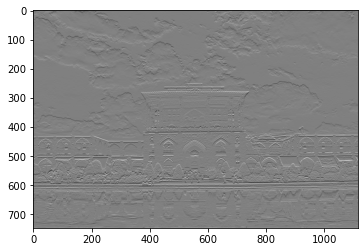

In [82]:
hor_filter = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])
temp_test_hor_edge = edge_detect(hor_filter, img_arr)

## Q-2.2
لبه های عمودی

[[144 125 127 ... 127 127 159]
 [144 127 127 ... 127 127 159]
 [144 131 128 ... 127 127 159]
 ...
 [153 128 126 ... 127 127 151]
 [153 128 126 ... 127 127 151]
 [153 128 126 ... 127 127 151]]


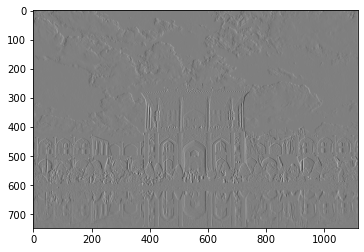

In [83]:
ver_filter = np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])
temp_test_ver_edge = edge_detect(ver_filter, img_arr)

## Q-2.3
لبه های عمودی و افقی

[[161 163 167 ... 192 192 192]
 [162 131 132 ... 132 132 192]
 [167 132 128 ... 131 131 192]
 ...
 [180 131 131 ... 132 132 176]
 [180 131 131 ... 131 131 175]
 [180 179 179 ... 175 175 175]]


array([[161, 163, 167, ..., 192, 192, 192],
       [162, 131, 132, ..., 132, 132, 192],
       [167, 132, 128, ..., 131, 131, 192],
       ...,
       [180, 131, 131, ..., 132, 132, 176],
       [180, 131, 131, ..., 131, 131, 175],
       [180, 179, 179, ..., 175, 175, 175]])

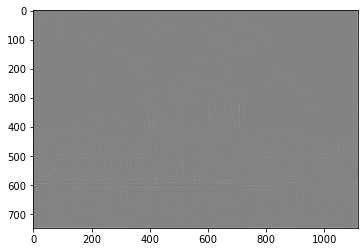

In [84]:
ver_hor_filter = np.array([[0, -1, 0],
                          [-1, 4, -1],
                          [0, -1, 0]])
edge_detect(ver_hor_filter, img_arr)

## Q-2.4
لبه های قطری

[[143 145 146 ... 168 168 168]
 [144 118 119 ... 119 119 169]
 [147 118 115 ... 118 118 169]
 ...
 [159 118 117 ... 118 118 156]
 [159 118 117 ... 118 118 155]
 [158 158 158 ... 155 155 155]]


array([[143, 145, 146, ..., 168, 168, 168],
       [144, 118, 119, ..., 119, 119, 169],
       [147, 118, 115, ..., 118, 118, 169],
       ...,
       [159, 118, 117, ..., 118, 118, 156],
       [159, 118, 117, ..., 118, 118, 155],
       [158, 158, 158, ..., 155, 155, 155]])

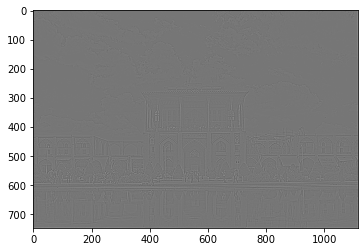

In [85]:
all_diag_filter = np.array([[-1, 0, -1],
                          [0, 4, 0],
                          [-1, 0, -1]])
edge_detect(all_diag_filter, img_arr)

## Q-2.5
آیا نتیجه اعمال یک لبه یاب الپالسین با توالی لبه یاب عمودی- لبه یاب افقی- لبه یاب قطرهای اصلی و قطرهای فرعی یکسان است؟

خیر. 
اعمال متوالی لبه افقی و عمودی، به این معناست که لبه یاب عمودی بر روی خروجی لبه یاب افقی اعمال شود.
خروجی لبه یاب عمودی با تصویر اصلی بسیار متفاوت است و اعمال لبه یاب عمودی بر روی این خروجی لابه های عمودی تصویر اصلی را مشخص نمیکند.

[[134 134 136 ... 148 148 148]
 [134 119 120 ... 120 120 148]
 [136 119 116 ... 119 119 148]
 ...
 [143 119 118 ... 119 119 141]
 [143 119 118 ... 119 119 140]
 [142 142 142 ... 140 140 140]]


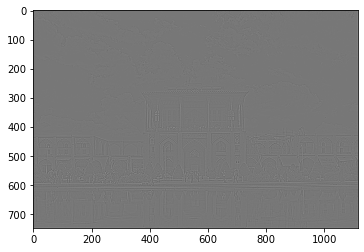

In [40]:
lap = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [-1, -1, -1]])
lap_edge = edge_detect(lap, img_arr)

[[145 145 145 ... 161 161 161]
 [125 127 130 ... 127 127 127]
 [125 126 129 ... 127 127 127]
 ...
 [128 128 128 ... 130 130 130]
 [128 128 128 ... 130 130 129]
 [154 154 154 ... 152 152 152]]
[[161 115 116 ... 116 117 164]
 [158 112 115 ... 116 117 160]
 [157 113 116 ... 116 117 157]
 ...
 [157 116 117 ... 118 118 158]
 [159 117 117 ... 117 117 160]
 [163 117 117 ... 117 117 162]]
[[174 145 153 ... 153 146 175]
 [183  77 111 ... 112  83 183]
 [182  79 111 ... 112  84 181]
 ...
 [182  83 114 ... 113  84 181]
 [183  83 113 ... 113  82 183]
 [175 146 153 ... 153 146 174]]


array([[174, 145, 153, ..., 153, 146, 175],
       [183,  77, 111, ..., 112,  83, 183],
       [182,  79, 111, ..., 112,  84, 181],
       ...,
       [182,  83, 114, ..., 113,  84, 181],
       [183,  83, 113, ..., 113,  82, 183],
       [175, 146, 153, ..., 153, 146, 174]])

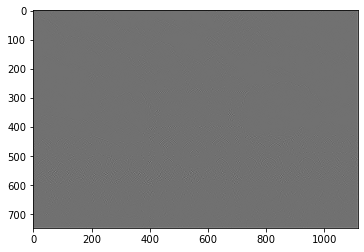

In [41]:
# hor_filter, ver_filter, all_diag_filter
edge_detect(all_diag_filter, edge_detect(ver_filter, edge_detect(hor_filter, img_arr)))

# Exercise 3
تصویر چارلی چاپلین را به کمک هر یک از بیت های زیر نمایش دهید

(array([[ 71,  65,  56, ...,   5,   0,  41],
        [ 51,  47,  43, ...,   5,   0,  41],
        [ 37,  33,  30, ...,   5,   0,  41],
        ...,
        [ 85,  83, 102, ..., 119, 150, 184],
        [ 88,  95, 106, ..., 118, 149, 186],
        [ 90, 105, 110, ..., 110, 142, 182]], dtype=uint8),
 (288, 480))

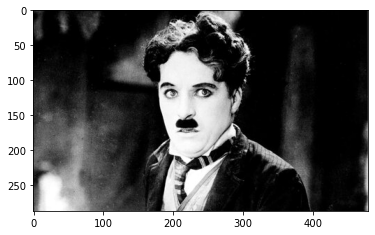

In [42]:
im = Image.open("assignment1/assignment1/images/charli.jpeg").convert('L')
# im.show()

img_arr = asarray(im)
imgplot = plt.imshow(img_arr , cmap="gray")

img_arr, img_arr.shape

In [43]:
def bit_slicing(img_arr, bit_list):
    img_arr_bin = np.zeros((img_arr.shape[0], img_arr.shape[1], 8))
    # msb(8) = img_arr_bin[][][0]
    # lsb(1) = img_arr_bin[][][7]
    out = np.zeros(img_arr.shape)

    temp_num = 0
    for bit in bit_list:
        temp_num += 2 ** (bit-1)
    
    # print('power num(temp_num): ', temp_num)
    out = img_arr & temp_num
    plt.imshow(out, cmap="gray")
    
    return out     

## Q-3.1
بیت های ۷ و ۸

array([[ 64,  64,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 64,  64,  64, ...,  64, 128, 128],
       [ 64,  64,  64, ...,  64, 128, 128],
       [ 64,  64,  64, ...,  64, 128, 128]], dtype=uint8)

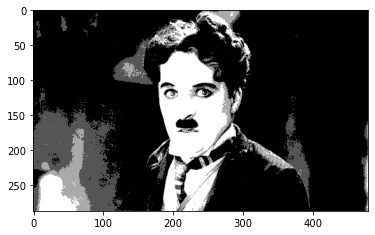

In [44]:
bit_slicing(img_arr, [7, 8])

## Q-3.2
بیت های ۶و۷و۸

array([[ 64,  64,  32, ...,   0,   0,  32],
       [ 32,  32,  32, ...,   0,   0,  32],
       [ 32,  32,   0, ...,   0,   0,  32],
       ...,
       [ 64,  64,  96, ...,  96, 128, 160],
       [ 64,  64,  96, ...,  96, 128, 160],
       [ 64,  96,  96, ...,  96, 128, 160]], dtype=uint8)

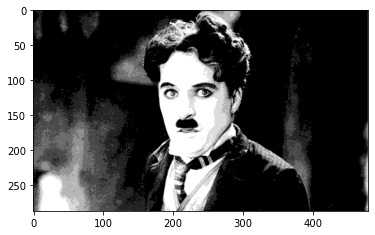

In [45]:
bit_slicing(img_arr, [6, 7, 8])

## Q-3.3
بیت های ۱ الی ۴

array([[ 7,  1,  8, ...,  5,  0,  9],
       [ 3, 15, 11, ...,  5,  0,  9],
       [ 5,  1, 14, ...,  5,  0,  9],
       ...,
       [ 5,  3,  6, ...,  7,  6,  8],
       [ 8, 15, 10, ...,  6,  5, 10],
       [10,  9, 14, ..., 14, 14,  6]], dtype=uint8)

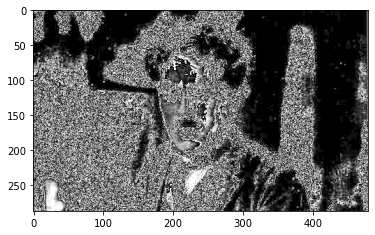

In [46]:
bit_slicing(img_arr, [1, 2, 3, 4])

# Exercise 4
هیستوگرام تصویر jpg.histogram را نمایش دهید

(array([[ 84,  89,  90, ..., 146, 148, 138],
        [ 89,  93,  95, ..., 155, 158, 148],
        [ 92,  96,  98, ..., 153, 155, 146],
        ...,
        [ 94,  99, 103, ...,  35,  35,  35],
        [ 93,  98, 102, ...,  35,  35,  35],
        [ 87,  93,  96, ...,  35,  35,  35]], dtype=uint8),
 (720, 1280))

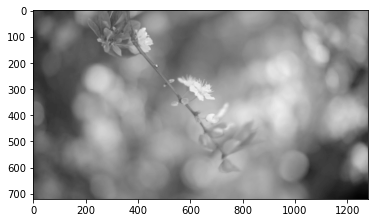

In [47]:
im = Image.open("assignment1/assignment1/images/histogram.jpeg").convert('L')
# im.show()

img_arr = asarray(im)
imgplot = plt.imshow(img_arr , cmap="gray")

img_arr, img_arr.shape

In [48]:
def histogram(img_arr):
    intensity = np.zeros(256)
    for i in img_arr:
        for j in i:
            intensity[j] += 1
    intensity = intensity.astype(int)
    plt.plot(intensity, aa=True)

    plt.title("Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Count")

    plt.show()

## Q-4.1

بر اساس هیستوگرام تصویر داده شده چه استنتاجی از کنتراست تصویر دارید؟

با توجه به هیستوگرام، پراکندگی داده ها نسبت به میانگین کم است و ورایانس کم است.
در نتیجه کنتراست تصویر کم است.

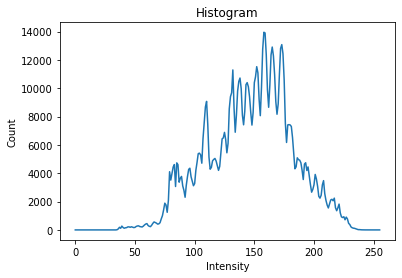

In [49]:
histogram(img_arr)

In [50]:
img_arr.var()

1229.8413434992176

## Q-4.2
میزان روشنایی همه ی پیکسل های تصویر ۳۰ واحد کم کنید. هیستوگرام تصویر را به دست آورید. هیستوگرام تصویر چه
تفاوتی کرده است

هیستوگرام 30 واحد به سمت چپ شیفت میکند.

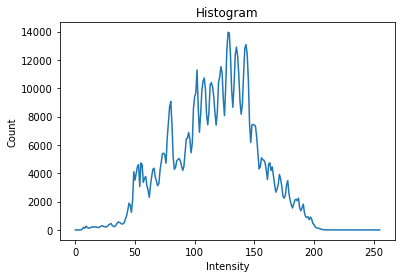

In [51]:
out1 = img_arr - 30
out1[out1<0] = 0
histogram(out1)

# histogram shifts 30 units to left

## Q-4.3
تصویر را با بیت های ۶ و ۷ و۸ نمایش دهید و هیستوگرام آن را رسم کنید. بر روی نتیجه بحث کنید

در تصویر خروجی، مقدار گری لول هر پیکسل مقادیر مشخص دارد، پس در هیستوگرام فقط همان مقادیر مشخص فراوانی دارند.
آن مقادیر مشخص هم توان های 2 و جمع توان های 2 است.
32, 64, 32+64, 128, ...

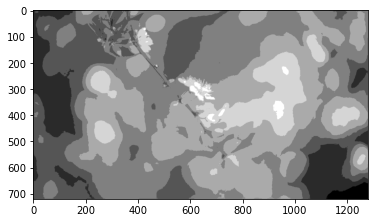

In [52]:
out2 = bit_slicing(img_arr, [6, 7, 8])

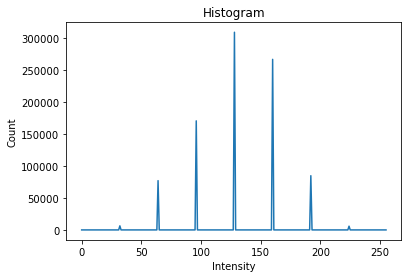

In [53]:
histogram(out2)

# Exercise 5
تصویری به دلخواه را اختیار کنید و مراحل زیر را بر روی آن انجام دهید

(array([[ 84,  89,  90, ..., 146, 148, 138],
        [ 89,  93,  95, ..., 155, 158, 148],
        [ 92,  96,  98, ..., 153, 155, 146],
        ...,
        [ 94,  99, 103, ...,  35,  35,  35],
        [ 93,  98, 102, ...,  35,  35,  35],
        [ 87,  93,  96, ...,  35,  35,  35]], dtype=uint8),
 (720, 1280))

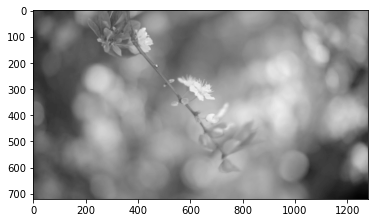

In [54]:
im = Image.open("assignment1/assignment1/images/histogram.jpeg").convert('L')
# im.show()

img_arr = asarray(im)
imgplot = plt.imshow(img_arr , cmap="gray")

img_arr, img_arr.shape

## Q-5.1
تصویر را به نویز نمک و فلفل آغشته کنید

(<matplotlib.image.AxesImage at 0x1b80830c948>, 13646, 27648, 921600)

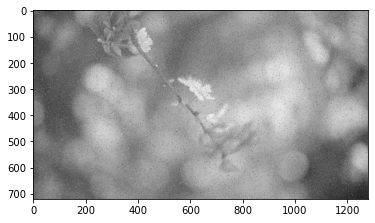

In [55]:
sp_intensity = 3 # 0-100
sp_img = np.array(img_arr)

sp_count = int((sp_intensity/100) * (img_arr.shape[0]*img_arr.shape[1]))

for count in range(sp_count):
    x = random.randint(0, img_arr.shape[0]-1)
    y = random.randint(0, img_arr.shape[1]-1)
    b_or_w = random.randint(0, 1)
    sp_img[x][y] = b_or_w * 255
    

plt.imshow(sp_img , cmap="gray"),len(sp_img[sp_img == 0]), sp_count, img_arr.shape[0]*img_arr.shape[1]

## Q-5.2
فیلتر میانگین یکنواخت را بر روی تصویر آغشته به نویز اعمال کنید

In [56]:
def box_filter(filter_size, img_arr):
    # (x-1, y-1) (x-1, y) (x-1, y+1)
    # (x,   y-1) (x,   y) (x,   y+1) 
    # (x+1, y-1) (x+1, y) (x+1, y+1)
    out = np.zeros(img_arr.shape)
    for x in range(img_arr.shape[0]):
        for y in range(img_arr.shape[1]):

            new_val = 0
            count = 0
            for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
                for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
                    if not (x+f_i < 0 or x+f_i >= img_arr.shape[0] or y+f_j<0 or y+f_j >=img_arr.shape[1]):
                        new_val += img_arr[x+f_i][y+f_j]
                        count+=1
                    else:
                        new_val += 0

            out[x][y] = int(new_val/count)

    imgplot = plt.imshow(out , cmap="gray")
    return out.astype(int)


array([[ 91,  91,  91, ..., 150, 149, 149],
       [ 92,  92,  91, ..., 150, 150, 150],
       [ 92,  92,  91, ..., 151, 150, 150],
       ...,
       [ 97,  98,  98, ...,  35,  35,  35],
       [ 96,  97,  97, ...,  35,  35,  35],
       [ 96,  96,  97, ...,  35,  35,  35]])

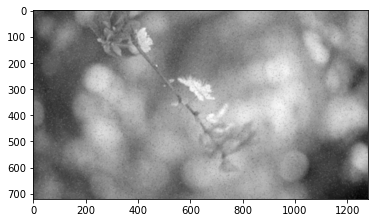

In [57]:
box_filter(5, sp_img)

## Q-5.3
فیلتر میانگین وزن دار گوسی را بر روی تصویر آغشته به نویز با سیگمای دلخواه اعمال کنید

In [58]:
# G(s,t) = K exp(- (s2+t2) / 2 sgima2)
def gauss_kernel(k_param, sigma, filter_size):
    out = np.zeros((filter_size, filter_size))
    for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
        for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
            out[int(filter_size/2)+f_i][int(filter_size/2)+f_j] = k_param * np.exp(-((f_i**2+f_j**2)/2*(sigma**2)))
      
    return out

In [59]:
def gaussian_filter(k_param, sigma, filter_size, img_arr):
    
    # (x-1, y-1) (x-1, y) (x-1, y+1)
    # (x,   y-1) (x,   y) (x,   y+1) 
    # (x+1, y-1) (x+1, y) (x+1, y+1)
    # kernel = gauss_kernel(k_param, sigma, filter_size)    
    gk= gauss_kernel(k_param, sigma, filter_size)
    gk = gk*(gk.sum()) 
    kernel = np.floor(gk)
    print("kernel: ", kernel)
    
    out = np.zeros(img_arr.shape)
    for x in range(img_arr.shape[0]):
        for y in range(img_arr.shape[1]):

            new_val = 0
            sum_coeff = 0
            for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
                for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
                    if not (x+f_i < 0 or x+f_i >= img_arr.shape[0] or y+f_j<0 or y+f_j >=img_arr.shape[1]):
                        new_val += img_arr[x+f_i][y+f_j] * kernel[int(filter_size/2)+f_i][int(filter_size/2)+f_j]
                        sum_coeff += kernel[int(filter_size/2)+f_i][int(filter_size/2)+f_j]
                    else:
                        new_val += 0
                        sum_coeff += 0

            # if x==0 and y==0: print(sum_coeff, img_arr[x][y], new_val)
            out[x][y] = int(new_val/sum_coeff)

    imgplot = plt.imshow(out , cmap="gray")
    return out


kernel:  [[0. 0. 0. 0. 0.]
 [0. 2. 3. 2. 0.]
 [0. 3. 6. 3. 0.]
 [0. 2. 3. 2. 0.]
 [0. 0. 0. 0. 0.]]


array([[ 87.,  89.,  90., ..., 149., 148., 145.],
       [ 90.,  92.,  93., ..., 152., 151., 148.],
       [ 92.,  94.,  95., ..., 153., 152., 149.],
       ...,
       [ 95.,  98., 101., ...,  35.,  35.,  35.],
       [ 93.,  96.,  99., ...,  35.,  35.,  35.],
       [ 91.,  94.,  96., ...,  35.,  35.,  35.]])

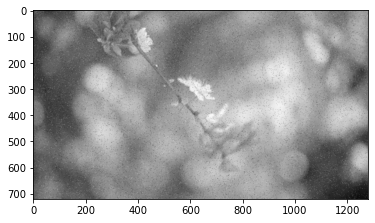

In [60]:
gaussian_filter(1, 1, 5, sp_img)

## Q-5.4
فیلتر میانه بر روی تصویر آغشته به نویز با سیگمای دلخواه اعمال کنید

In [61]:
def median_filter(filter_size, img_arr):
    # (x-1, y-1) (x-1, y) (x-1, y+1)
    # (x,   y-1) (x,   y) (x,   y+1) 
    # (x+1, y-1) (x+1, y) (x+1, y+1)
    out = np.zeros(img_arr.shape)
    for x in range(img_arr.shape[0]):
        for y in range(img_arr.shape[1]):

            list = []
            for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
                for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
                    if not (x+f_i < 0 or x+f_i >= img_arr.shape[0] or y+f_j<0 or y+f_j >=img_arr.shape[1]):
                        list.append(img_arr[x+f_i][y+f_j])

            out[x][y] = np.median(np.array(list))


    imgplot = plt.imshow(out , cmap="gray")
    return out.astype(int)


array([[ 89,  89,  91, ..., 151, 148, 148],
       [ 90,  92,  93, ..., 153, 148, 148],
       [ 92,  95,  95, ..., 155, 153, 151],
       ...,
       [ 96,  99, 101, ...,  35,  35,  35],
       [ 93,  96,  99, ...,  35,  35,  35],
       [ 93,  94,  97, ...,  35,  35,  35]])

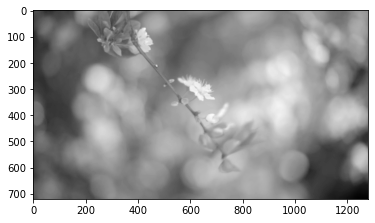

In [62]:
median_filter(3, sp_img)

## Q-5.5
فیلتر ماکیزمم را بر روی تصویر آغشته به نویزاعمال کنید

In order for max filter to have positive effect on noisy picture, noises must be dark. if noises are lighter (intensity = 255) the max filter would pick noise as value for pixels near a noise.

(<matplotlib.image.AxesImage at 0x1b808350108>, 44921, 46080, 921600)

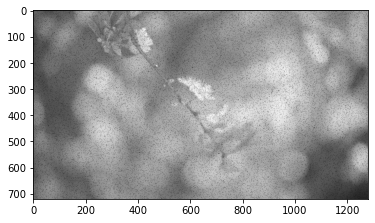

In [63]:
sp_intensity = 5 # 0-100
sp_img = np.array(img_arr)

sp_count = int((sp_intensity/100) * (img_arr.shape[0]*img_arr.shape[1]))

for count in range(sp_count):
    x = random.randint(0, img_arr.shape[0]-1)
    y = random.randint(0, img_arr.shape[1]-1)
    sp_img[x][y] = 0

plt.imshow(sp_img , cmap="gray"),len(sp_img[sp_img == 0]), sp_count, img_arr.shape[0]*img_arr.shape[1]

In [64]:
def max_filter(filter_size, img_arr):
    # (x-1, y-1) (x-1, y) (x-1, y+1)
    # (x,   y-1) (x,   y) (x,   y+1) 
    # (x+1, y-1) (x+1, y) (x+1, y+1)
    out = np.zeros(img_arr.shape)
    for x in range(img_arr.shape[0]):
        for y in range(img_arr.shape[1]):

            list = []
            for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
                for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
                    if not (x+f_i < 0 or x+f_i >= img_arr.shape[0] or y+f_j<0 or y+f_j >=img_arr.shape[1]):
                        list.append(img_arr[x+f_i][y+f_j])

            out[x][y] = max(np.array(list))


    imgplot = plt.imshow(out , cmap="gray")
    return out.astype(int)


array([[ 98,  98,  98, ..., 158, 158, 158],
       [ 98,  98,  98, ..., 158, 158, 158],
       [ 98,  98,  98, ..., 158, 158, 158],
       ...,
       [105, 105, 105, ...,  36,  36,  36],
       [103, 103, 103, ...,  36,  36,  36],
       [103, 103, 103, ...,  36,  36,  35]])

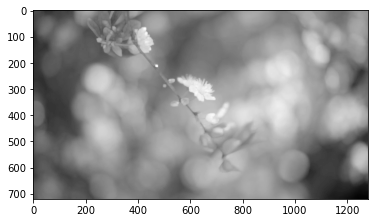

In [65]:
max_filter(5, sp_img)

## Q-5.6
فیلتر مینیمم را بر روی تصویر آغشته به نویز اعمال کنید

Same as Max filter, input for Min filter must have lighter noises, if noises are black(intensity = 0) Min filter would pick noise as value for pixels nearby.

(<matplotlib.image.AxesImage at 0x1b809ed3088>, 0, 46080, 921600)

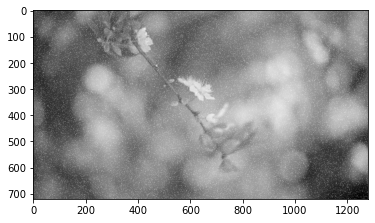

In [66]:
sp_intensity = 5 # 0-100
sp_img = np.array(img_arr)

sp_count = int((sp_intensity/100) * (img_arr.shape[0]*img_arr.shape[1]))

for count in range(sp_count):
    x = random.randint(0, img_arr.shape[0]-1)
    y = random.randint(0, img_arr.shape[1]-1)
    sp_img[x][y] = 255

plt.imshow(sp_img , cmap="gray"),len(sp_img[sp_img == 0]), sp_count, img_arr.shape[0]*img_arr.shape[1]

In [67]:
def min_filter(filter_size, img_arr):
    # (x-1, y-1) (x-1, y) (x-1, y+1)
    # (x,   y-1) (x,   y) (x,   y+1) 
    # (x+1, y-1) (x+1, y) (x+1, y+1)
    out = np.zeros(img_arr.shape)
    for x in range(img_arr.shape[0]):
        for y in range(img_arr.shape[1]):

            list = []
            for f_i in range(-int(filter_size/2), int(filter_size/2)+1):
                for f_j in range(-int(filter_size/2), int(filter_size/2)+1):
                    if not (x+f_i < 0 or x+f_i >= img_arr.shape[0] or y+f_j<0 or y+f_j >=img_arr.shape[1]):
                        list.append(img_arr[x+f_i][y+f_j])

            out[x][y] = min(np.array(list))


    imgplot = plt.imshow(out , cmap="gray")
    return out.astype(int)


array([[ 84,  84,  84, ..., 138, 138, 138],
       [ 84,  84,  84, ..., 138, 138, 138],
       [ 84,  84,  84, ..., 138, 138, 138],
       ...,
       [ 87,  87,  87, ...,  35,  35,  35],
       [ 87,  87,  87, ...,  35,  35,  35],
       [ 87,  87,  87, ...,  35,  35,  35]])

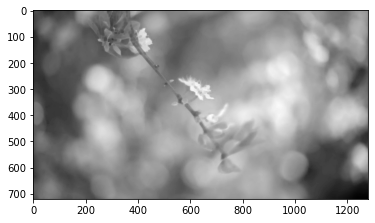

In [68]:
min_filter(5, sp_img)

## Q-5.7
در خصوص عملکرد هر یک از فیلترهای فوق بحث کنید

**Box filter(Average):** 
if filter_size is big enough, Box filter eliminates noises but it also blurs the image.

**Gaussian filter(weighted average):**
increasing Sigma would result in more blured image, also eliminates noises.
(smoother edges)

**Median filter:**
Best performance for eliminating noises.

**Maximum Filter:**
if noises are white, it picks noises for nearby pixels and expands white noises, but if noises are darker and black(I = 0) it works pretty well because it replaces nearby pixel's intensity for noises.

**Minimum Filter:**
works for White noises(I = 255). (in the same way as Maximum Filter)

# Exercise 6
هر یک از تبدیالت هندسی زیر را بر روی تصویر عمارت عالی قاپو انجام دهید

(array([[108, 112, 116, ..., 213, 213, 213],
        [111, 112, 113, ..., 214, 214, 214],
        [117, 113, 109, ..., 214, 214, 214],
        ...,
        [170, 169, 169, ..., 158, 158, 158],
        [170, 169, 169, ..., 156, 156, 156],
        [170, 169, 169, ..., 155, 155, 155]], dtype=uint8),
 (748, 1116))

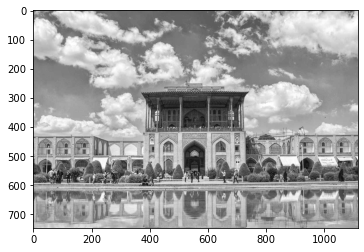

In [69]:
im = Image.open("assignment1/assignment1/images/alighapoo.jpg").convert('L')
# im.show()

img_arr = asarray(im)
imgplot = plt.imshow(img_arr , cmap="gray")

img_arr, img_arr.shape

In [70]:
import numpy as np
from scipy import ndimage
 
# exchange x and y when using
def GetBilinearPixel(imArr, posX, posY):
    out = 0

    #Get integer and fractional parts of numbers
    modXi = int(posX)
    modYi = int(posY)
    modXf = posX - modXi
    modYf = posY - modYi
    modXiPlusOneLim = min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim = min(modYi+1,imArr.shape[0]-1)

    #if (modYi==10 and modXi == 500) or (modYi==10 and modXiPlusOneLim==500) or (modYiPlusOneLim==10 and modXi==500) or (modYiPlusOneLim==10 and modXiPlusOneLim==500):
    #    print(posX , posY)
    
    #if (modYi==500 and modXi == 10) or (modYi==500 and modXiPlusOneLim==10) or (modYiPlusOneLim==500 and modXi==10) or (modYiPlusOneLim==500 and modXiPlusOneLim==10):
     #   print(posX , posY)
    
    #Get pixels in four corners
    bl = imArr[modYi, modXi]
    br = imArr[modYi, modXiPlusOneLim]
    tl = imArr[modYiPlusOneLim, modXi]
    tr = imArr[modYiPlusOneLim, modXiPlusOneLim]

    #Calculate interpolation
    b = modXf * br + (1. - modXf) * bl
    t = modXf * tr + (1. - modXf) * tl
    pxf = modYf * t + (1. - modYf) * b
    out = (int(pxf+0.5))

    return out

## Q-6.1
تصویر را دو برابر کنید

In [71]:
def scaling(k, img_arr):
    new_height = img_arr.shape[0]*k
    new_width = img_arr.shape[1]*k

    out = np.zeros((new_height, new_width)) 

    T = np.array([[k, 0, 0],
                 [0, k, 0],
                 [0, 0, 1]])
    
    T_inv = inv(T)

    for x_p in range(new_height):
        for y_p in range(new_width):
            res = T_inv @ np.array([x_p, y_p, 1])
            x_orig = res[0] 
            y_orig = res[1]
                     
            intensity = GetBilinearPixel(img_arr, y_orig, x_orig)
            out[x_p][y_p] = intensity
            #break
        #break
    
    print(out)
    imgplot = plt.imshow(out , cmap="gray")
    return out

[[108. 110. 112. ... 213. 213. 213.]
 [110. 111. 112. ... 214. 214. 214.]
 [111. 112. 112. ... 214. 214. 214.]
 ...
 [170. 170. 169. ... 156. 156. 156.]
 [170. 170. 169. ... 155. 155. 155.]
 [170. 170. 169. ... 155. 155. 155.]]


array([[108., 110., 112., ..., 213., 213., 213.],
       [110., 111., 112., ..., 214., 214., 214.],
       [111., 112., 112., ..., 214., 214., 214.],
       ...,
       [170., 170., 169., ..., 156., 156., 156.],
       [170., 170., 169., ..., 155., 155., 155.],
       [170., 170., 169., ..., 155., 155., 155.]])

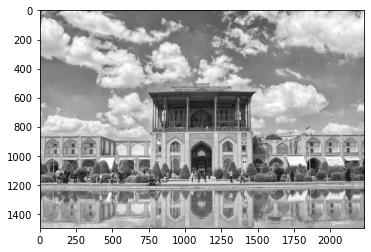

In [72]:
scaling(2, img_arr)

## Q-6.2
 تصویر را به اندازه ۳۰ درچه بچرخانید

In [73]:
def rotate_and_scale(theta, img_arr):
    new_height = int(img_arr.shape[0] * math.cos(math.radians(theta))+ img_arr.shape[1] * math.sin(math.radians(theta)))
    new_width =  int(img_arr.shape[0] * math.sin(math.radians(theta))+ img_arr.shape[1] * math.cos(math.radians(theta)))
    print(new_height, new_width)
    out = np.zeros((new_height, new_width)) 
    
    temp = math.ceil(img_arr.shape[0] * math.sin(math.radians(theta)))-1
   
    T = np.array([[math.cos(math.radians(theta)), math.sin(math.radians(theta)), 0],
                 [-math.sin(math.radians(theta)), math.cos(math.radians(theta)), 0],
                 [0, 0, 1]])
    
    T_inv = inv(T)
     
    for x_p in range(new_height):
        for y_p in range(-temp, new_width-temp):
            res = T_inv @ np.array([x_p, y_p, 1])
            x_orig = res[0] 
            y_orig = res[1]
     
            
            if x_orig < 0 or x_orig >= img_arr.shape[0] or y_orig < 0 or y_orig >= img_arr.shape[1]:
                continue
         
            
            intensity = GetBilinearPixel(img_arr, y_orig, x_orig)
            out[x_p][y_p+temp] = intensity
            #out[x_p][y_p] = intensity
    
    print(out)
    imgplot = plt.imshow(out , cmap="gray")
    return out

1205 1340
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


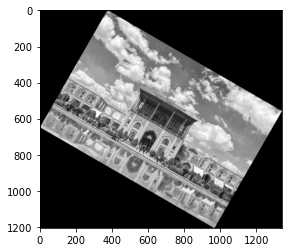

In [74]:
out = rotate_and_scale(30,  img_arr) #600, 1000

In [75]:
matplotlib.image.imsave('temp.png', out, cmap='gray')

## Q-6.3
تصویر را به میزان دلخواه در راستای افق بکشید

In [76]:
def custom_shearing(k_hor_shear, k_ver_shear, img_arr):
    new_height = int(img_arr.shape[1]*k_hor_shear+img_arr.shape[0])
    new_width = int(img_arr.shape[0]*k_ver_shear+img_arr.shape[1])

    out = np.zeros((new_height, new_width)) 

    T = np.array([[1, k_hor_shear, 0],
                 [k_ver_shear, 1, 0],
                 [0, 0, 1]])
    
    T_inv = inv(T)

    for x_p in range(new_height):
        for y_p in range(new_width):
            res = T_inv @ np.array([x_p, y_p, 1])
            x_orig = res[0] 
            y_orig = res[1]
                     
            if x_orig < 0 or x_orig >= img_arr.shape[0] or y_orig < 0 or y_orig >= img_arr.shape[1]:
                continue
        
            intensity = GetBilinearPixel(img_arr, y_orig, x_orig)
            out[x_p][y_p] = intensity
            #break
        #break
    
    print(out)
    imgplot = plt.imshow(out , cmap="gray")
    return out

[[108.   0.   0. ...   0.   0.   0.]
 [111. 112. 116. ...   0.   0.   0.]
 [117. 113. 113. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 156. 156. 157.]
 [  0.   0.   0. ... 155. 155. 156.]
 [  0.   0.   0. ...   0.   0. 155.]]


array([[108.,   0.,   0., ...,   0.,   0.,   0.],
       [111., 112., 116., ...,   0.,   0.,   0.],
       [117., 113., 113., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 156., 156., 157.],
       [  0.,   0.,   0., ..., 155., 155., 156.],
       [  0.,   0.,   0., ...,   0.,   0., 155.]])

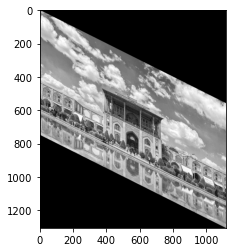

In [77]:
custom_shearing(0.5, 0, img_arr)

## Q-6.4
تصویر را به میزان دلخواه در راستای عمود بکشید

[[108. 112. 116. ...   0.   0.   0.]
 [  0. 112. 113. ...   0.   0.   0.]
 [  0. 117. 113. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 158. 158.   0.]
 [  0.   0.   0. ... 156. 156.   0.]
 [  0.   0.   0. ... 155. 155. 155.]]


array([[108., 112., 116., ...,   0.,   0.,   0.],
       [  0., 112., 113., ...,   0.,   0.,   0.],
       [  0., 117., 113., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 158., 158.,   0.],
       [  0.,   0.,   0., ..., 156., 156.,   0.],
       [  0.,   0.,   0., ..., 155., 155., 155.]])

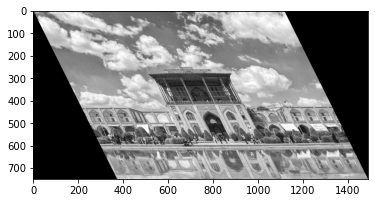

In [78]:
custom_shearing(0, 0.5, img_arr)

## Q-6.5
تصویر را دو برابر آنچه در راستای افق میکشید در راستای عمود بکشید

[[108.   0.   0. ...   0.   0.   0.]
 [  0. 112. 114. ...   0.   0.   0.]
 [  0. 116. 112. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 158. 158.   0.]
 [  0.   0.   0. ... 156. 156. 156.]
 [  0.   0.   0. ... 155. 155. 155.]]


array([[108.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 112., 114., ...,   0.,   0.,   0.],
       [  0., 116., 112., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 158., 158.,   0.],
       [  0.,   0.,   0., ..., 156., 156., 156.],
       [  0.,   0.,   0., ..., 155., 155., 155.]])

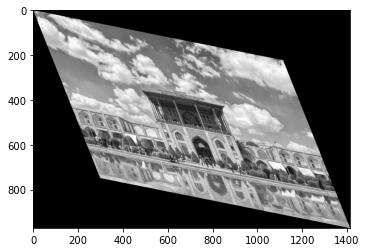

In [79]:
custom_shearing(0.2, 0.4, img_arr)